In [2]:
import pandas as pd
import numpy as np
import geopandas as gpd
import PIL
import io


In [3]:
base_url1 = 'https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_confirmed_global.csv'
confirm_df = pd.read_csv(base_url1)
confirm_df

Province/State      Country/Region        Lat        Long  1/22/20  \
0              NaN         Afghanistan  33.939110   67.709953        0   
1              NaN             Albania  41.153300   20.168300        0   
2              NaN             Algeria  28.033900    1.659600        0   
3              NaN             Andorra  42.506300    1.521800        0   
4              NaN              Angola -11.202700   17.873900        0   
..             ...                 ...        ...         ...      ...   
274            NaN             Vietnam  14.058324  108.277199        0   
275            NaN  West Bank and Gaza  31.952200   35.233200        0   
276            NaN               Yemen  15.552727   48.516388        0   
277            NaN              Zambia -13.133897   27.849332        0   
278            NaN            Zimbabwe -19.015438   29.154857        0   

     1/23/20  1/24/20  1/25/20  1/26/20  1/27/20  ...  9/20/21  9/21/21  \
0          0        0        0        0        0  ...   154585   154712   
1          0        0        0        0        0  ...   163404   164276   
2          0        0        0        0        0  ...   201766   201948   
3          0        0        0        0        0  ...    15140    15140   
4          0        0        0        0        0  ...    52644    52968   
..       ...      ...      ...      ...      ...  ...      ...      ...   
274        2        2        2        2        2  ...   695744   707436   
275        0        0        0        0        0  ...   386493   388470   
276        0        0        0        0        0  ...     8718     8752   
277        0        0        0        0        0  ...   208502   208599   
278        0        0        0        0        0  ...   128186   128186   

     9/22/21  9/23/21  9/24/21  9/25/21  9/26/21  9/27/21  9/28/21  9/29/21  
0     154757   154800   154960   154960   154960   155072   155093   155128  
1     165096   165864   166690   167354   167893   168188   168782   169462  
2     202122   202283   202449   202574   202722   202877   203045   203198  
3      15153    15156    15167    15167    15167    15189    15192    15209  
4      53387    53840    54280    54795    55121    55583    56040    56583  
..       ...      ...      ...      ...      ...      ...      ...      ...  
274   718963   728435   736972   746678   756689   766051   770640   779398  
275   390369   392452   394683   395677   396746   398946   400649   402255  
276     8789     8830     8861     8891     8934     8988     9016     9039  
277   208676   208715   208778   208829   208857   208867   208912   209002  
278   128804   129134   129134   129505   129625   129919   130272   130485  

[279 rows x 621 columns]

In [4]:
confirm_df = confirm_df.groupby('Country/Region').sum()

In [5]:
#drop Lat and Long:
confirm_df = confirm_df.drop(columns=['Lat', 'Long'])
confirm_df.head(20)

1/22/20  1/23/20  1/24/20  1/25/20  1/26/20  1/27/20  \
Country/Region                                                              
Afghanistan                0        0        0        0        0        0   
Albania                    0        0        0        0        0        0   
Algeria                    0        0        0        0        0        0   
Andorra                    0        0        0        0        0        0   
Angola                     0        0        0        0        0        0   
Antigua and Barbuda        0        0        0        0        0        0   
Argentina                  0        0        0        0        0        0   
Armenia                    0        0        0        0        0        0   
Australia                  0        0        0        0        4        5   
Austria                    0        0        0        0        0        0   
Azerbaijan                 0        0        0        0        0        0   
Bahamas                    0        0        0        0        0        0   
Bahrain                    0        0        0        0        0        0   
Bangladesh                 0        0        0        0        0        0   
Barbados                   0        0        0        0        0        0   
Belarus                    0        0        0        0        0        0   
Belgium                    0        0        0        0        0        0   
Belize                     0        0        0        0        0        0   
Benin                      0        0        0        0        0        0   
Bhutan                     0        0        0        0        0        0   

                     1/28/20  1/29/20  1/30/20  1/31/20  ...  9/20/21  \
Country/Region                                           ...            
Afghanistan                0        0        0        0  ...   154585   
Albania                    0        0        0        0  ...   163404   
Algeria                    0        0        0        0  ...   201766   
Andorra                    0        0        0        0  ...    15140   
Angola                     0        0        0        0  ...    52644   
Antigua and Barbuda        0        0        0        0  ...     2603   
Argentina                  0        0        0        0  ...  5241394   
Armenia                    0        0        0        0  ...   253942   
Australia                  5        6        9        9  ...    88710   
Austria                    0        0        0        0  ...   725434   
Azerbaijan                 0        0        0        0  ...   473459   
Bahamas                    0        0        0        0  ...    20215   
Bahrain                    0        0        0        0  ...   274383   
Bangladesh                 0        0        0        0  ...  1544238   
Barbados                   0        0        0        0  ...     6631   
Belarus                    0        0        0        0  ...   518369   
Belgium                    0        0        0        0  ...  1224885   
Belize                     0        0        0        0  ...    18902   
Benin                      0        0        0        0  ...    21450   
Bhutan                     0        0        0        0  ...     2597   

                     9/21/21  9/22/21  9/23/21  9/24/21  9/25/21  9/26/21  \
Country/Region                                                              
Afghanistan           154712   154757   154800   154960   154960   154960   
Albania               164276   165096   165864   166690   167354   167893   
Algeria               201948   202122   202283   202449   202574   202722   
Andorra                15140    15153    15156    15167    15167    15167   
Angola                 52968    53387    53840    54280    54795    55121   
Antigua and Barbuda     2603     2625     2815     2815     2902     2923   
Argentina            5243231  5245265  5246998  5248847  5249840  5250402   
Armenia               2544

In [6]:
confirm_df.head(20)

1/22/20  1/23/20  1/24/20  1/25/20  1/26/20  1/27/20  \
Country/Region                                                              
Afghanistan                0        0        0        0        0        0   
Albania                    0        0        0        0        0        0   
Algeria                    0        0        0        0        0        0   
Andorra                    0        0        0        0        0        0   
Angola                     0        0        0        0        0        0   
Antigua and Barbuda        0        0        0        0        0        0   
Argentina                  0        0        0        0        0        0   
Armenia                    0        0        0        0        0        0   
Australia                  0        0        0        0        4        5   
Austria                    0        0        0        0        0        0   
Azerbaijan                 0        0        0        0        0        0   
Bahamas                    0        0        0        0        0        0   
Bahrain                    0        0        0        0        0        0   
Bangladesh                 0        0        0        0        0        0   
Barbados                   0        0        0        0        0        0   
Belarus                    0        0        0        0        0        0   
Belgium                    0        0        0        0        0        0   
Belize                     0        0        0        0        0        0   
Benin                      0        0        0        0        0        0   
Bhutan                     0        0        0        0        0        0   

                     1/28/20  1/29/20  1/30/20  1/31/20  ...  9/20/21  \
Country/Region                                           ...            
Afghanistan                0        0        0        0  ...   154585   
Albania                    0        0        0        0  ...   163404   
Algeria                    0        0        0        0  ...   201766   
Andorra                    0        0        0        0  ...    15140   
Angola                     0        0        0        0  ...    52644   
Antigua and Barbuda        0        0        0        0  ...     2603   
Argentina                  0        0        0        0  ...  5241394   
Armenia                    0        0        0        0  ...   253942   
Australia                  5        6        9        9  ...    88710   
Austria                    0        0        0        0  ...   725434   
Azerbaijan                 0        0        0        0  ...   473459   
Bahamas                    0        0        0        0  ...    20215   
Bahrain                    0        0        0        0  ...   274383   
Bangladesh                 0        0        0        0  ...  1544238   
Barbados                   0        0        0        0  ...     6631   
Belarus                    0        0        0        0  ...   518369   
Belgium                    0        0        0        0  ...  1224885   
Belize                     0        0        0        0  ...    18902   
Benin                      0        0        0        0  ...    21450   
Bhutan                     0        0        0        0  ...     2597   

                     9/21/21  9/22/21  9/23/21  9/24/21  9/25/21  9/26/21  \
Country/Region                                                              
Afghanistan           154712   154757   154800   154960   154960   154960   
Albania               164276   165096   165864   166690   167354   167893   
Algeria               201948   202122   202283   202449   202574   202722   
Andorra                15140    15153    15156    15167    15167    15167   
Angola                 52968    53387    53840    54280    54795    55121   
Antigua and Barbuda     2603     2625     2815     2815     2902     2923   
Argentina            5243231  5245265  5246998  5248847  5249840  5250402   
Armenia               2544

<AxesSubplot:>

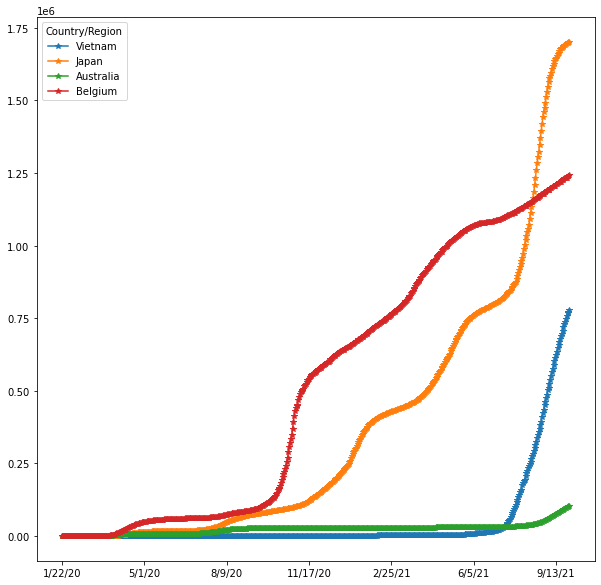

In [7]:
#7>
U_data = confirm_df.T
U_data.plot(y=['Vietnam', 'Japan','Australia','Belgium'], use_index= True, figsize= (10,10), marker = "*")


In [8]:
#read world map 
world = gpd.read_file(r'D:\IntroCSE\Final project\World_mapping')

In [9]:
world.replace('Viet Nam', 'Vietnam', inplace=True)
world.replace('Brunei Darussalam', 'Brunei', inplace=True)
world.replace('Democratic Republic of the Congo', 'Congo(Kinshasa)', inplace=True)
world.replace('Congo', 'Congo(Brazzaville', inplace=True)
world.replace('Czech Rebpulic', 'Czechia', inplace=True)
world.replace('Swaziland', 'Eswatini', inplace=True)
world.replace('Iran(Islamic Rebpulic of)', 'Iran', inplace=True)
world.replace('Korea, Rebpulic of', 'Korea South', inplace=True)
world.replace("Lao People's Democratic Rebpulic", 'Laos', inplace=True)
world.replace('Libyan Arab Jamahiriya', 'Libyan', inplace=True)
world.replace('Rebpublic of Moldova', 'Modova', inplace=True)
world.replace('The former YugosLav Rebpublic of Macedonia', 'North Macedonia', inplace=True)
world.replace('Syrian Arab Republic', 'Syria', inplace=True)
world.replace('Taiwan', 'Taiwan', inplace=True)
world.replace('United Republic of Tanzania', 'Tanzania', inplace=True)
world.replace('United Staes', 'US', inplace=True)
world.replace('Palestine', 'West Bank and Gaza', inplace=True)



In [445]:
#world.plot
#type(world)
#world.head(10)

In [446]:
#check names of the countries:
#for index, row in confirm_df.iterrows():
    #if index not in world['NAME'].to_list():
        #print(index,": is not in list")
    #else:
        #pass

In [10]:
#merging the confirm_df with world 
merge = world.join(confirm_df, on= 'NAME', how= 'right')

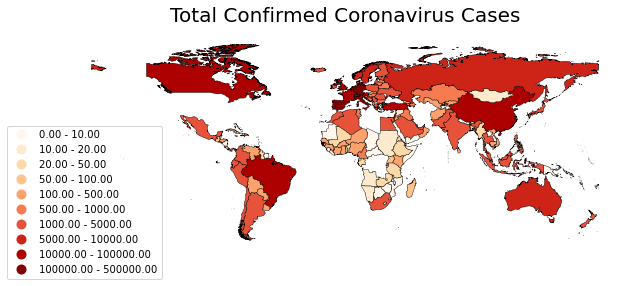

In [11]:
# 8> Create a map of total confirmed cases:
A = merge.plot(column= '4/5/20', cmap= 'OrRd', figsize= (10, 10), 
                legend= True, scheme= 'user_defined',
                classification_kwds= {'bins':[10, 20, 50, 100, 500, 1000, 5000, 10000, 100000, 500000]} ,
                edgecolor= 'Black', linewidth= 0.4)

A.set_title('Total Confirmed Coronavirus Cases', fontdict={'fontsize':20}, pad= 13)

#Remove the axes, and the legend:
A.set_axis_off()
A.get_legend().set_bbox_to_anchor((0.18, 0.6))

In [449]:
merge.columns

Index(['NAME', 'geometry', '1/22/20', '1/23/20', '1/24/20', '1/25/20',
       '1/26/20', '1/27/20', '1/28/20', '1/29/20',
       ...
       '9/20/21', '9/21/21', '9/22/21', '9/23/21', '9/24/21', '9/25/21',
       '9/26/21', '9/27/21', '9/28/21', '9/29/21'],
      dtype='object', length=619)

In [450]:
#type(merge.columns)

In [451]:
#merge.columns.to_list()

In [452]:
#for date in merge.columns.to_list()[2:10]:
    #print(date)

In [453]:
img_frames= []

C:\Users\HP\anaconda\lib\site-packages\geopandas\plotting.py:480: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig, ax = plt.subplots(figsize=figsize)


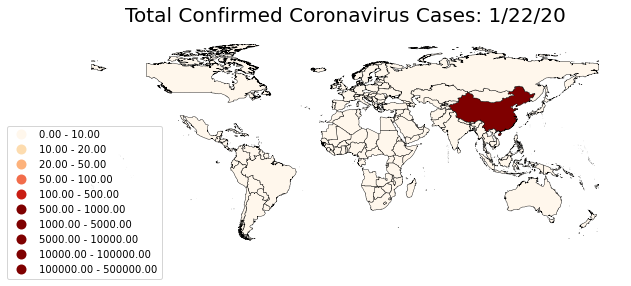

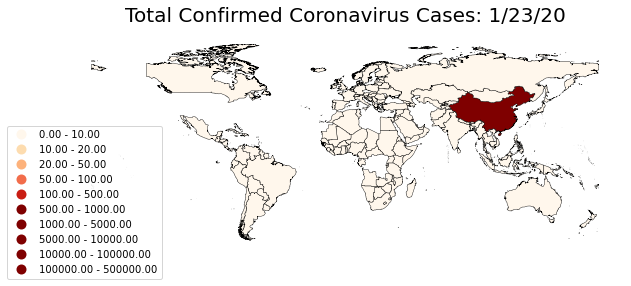

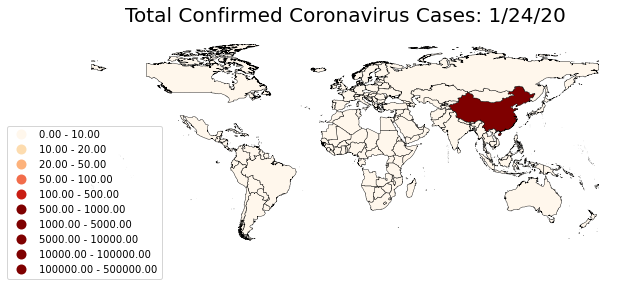

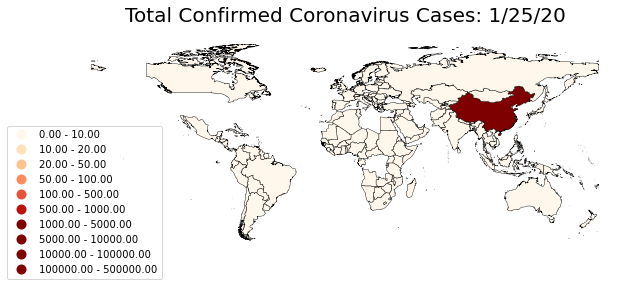

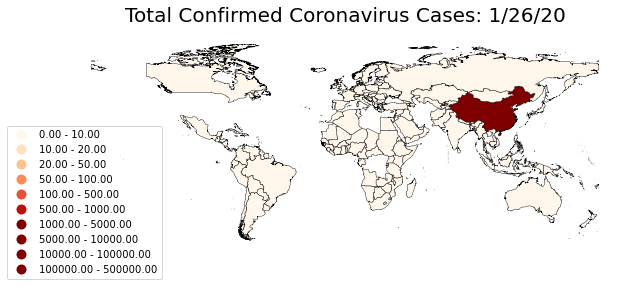

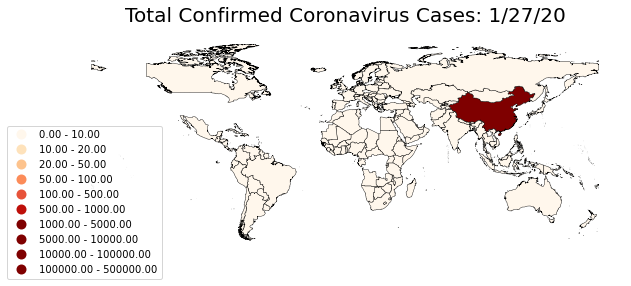

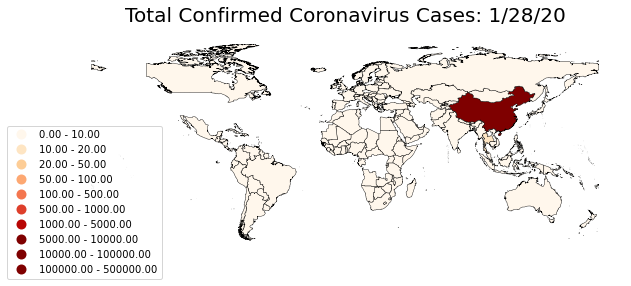

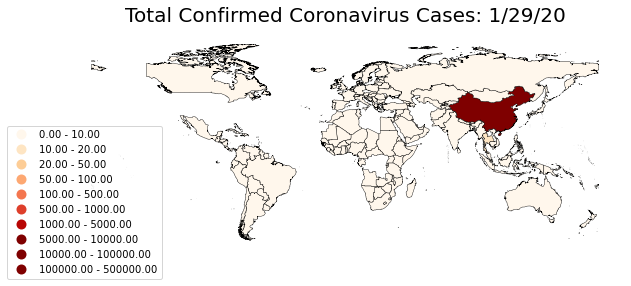

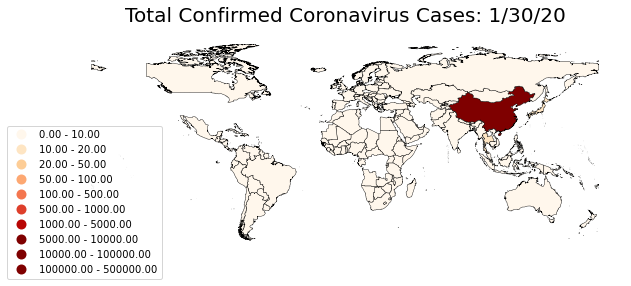

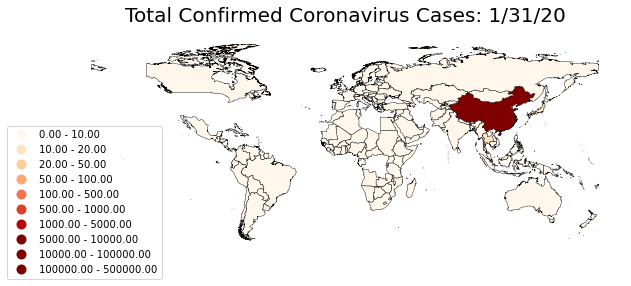

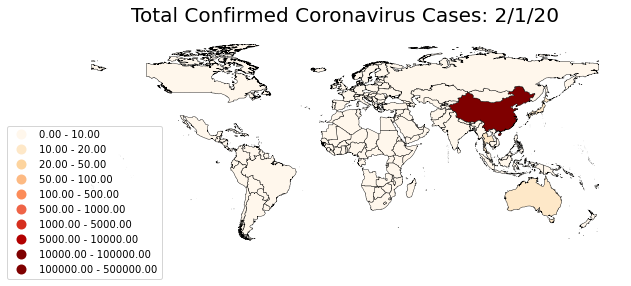

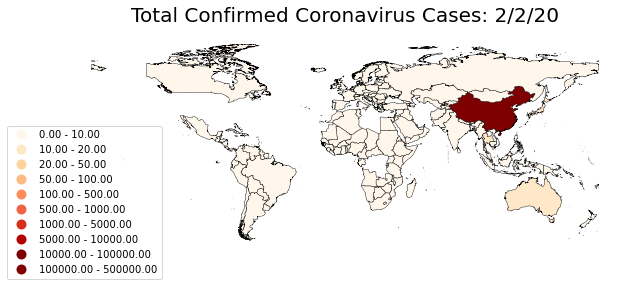

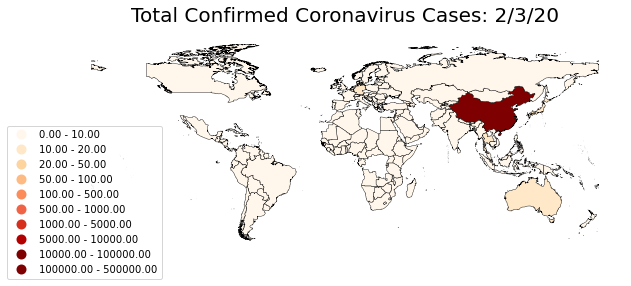

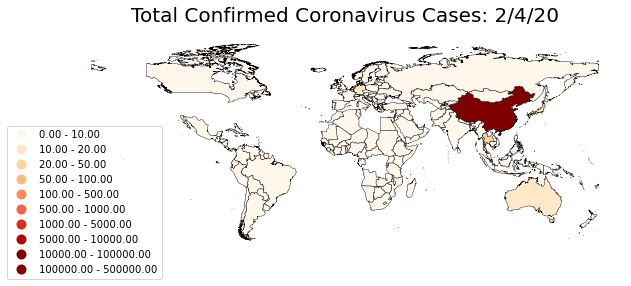

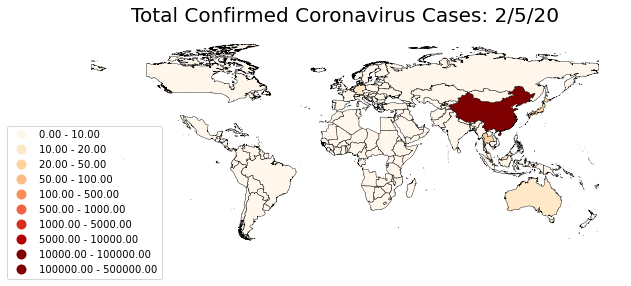

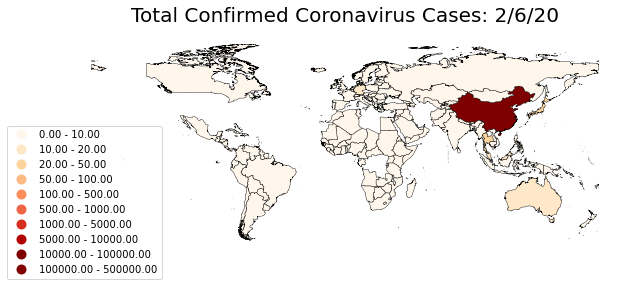

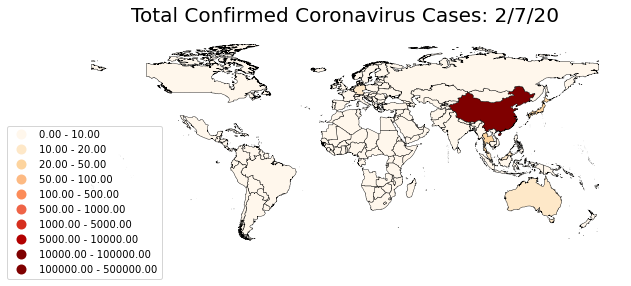

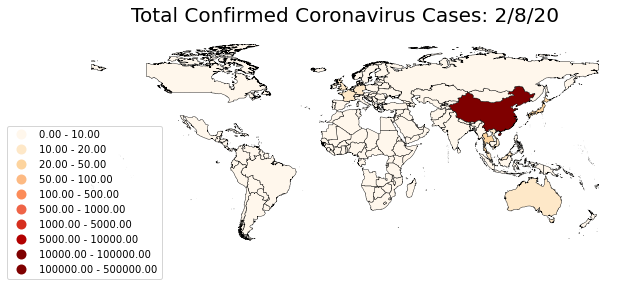

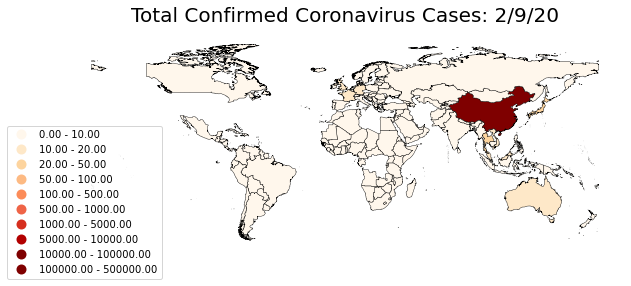

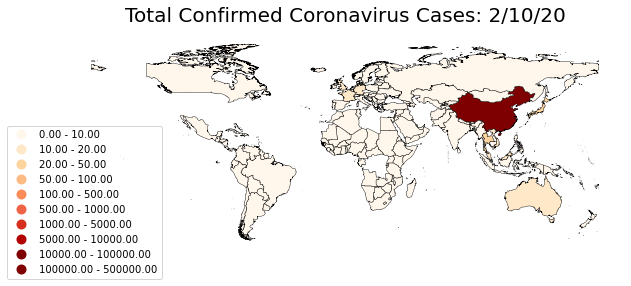

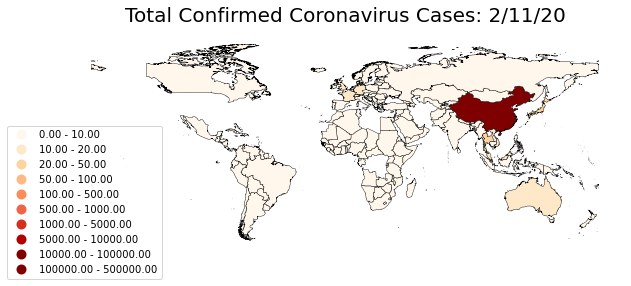

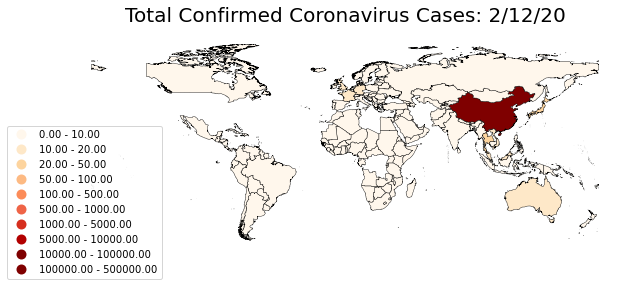

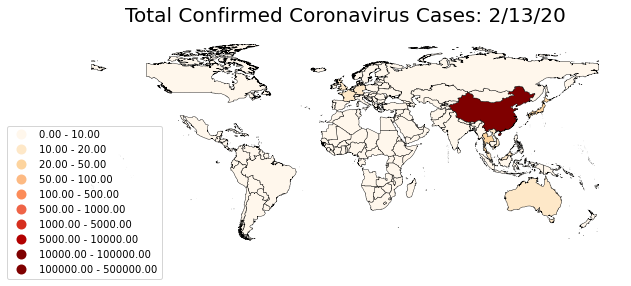

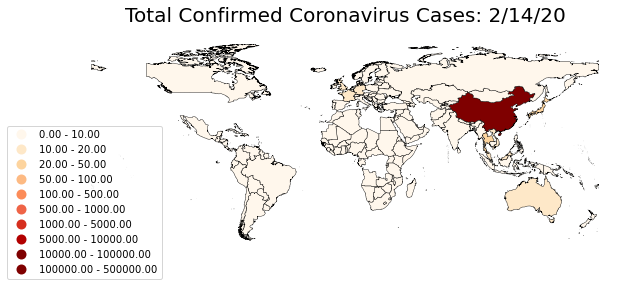

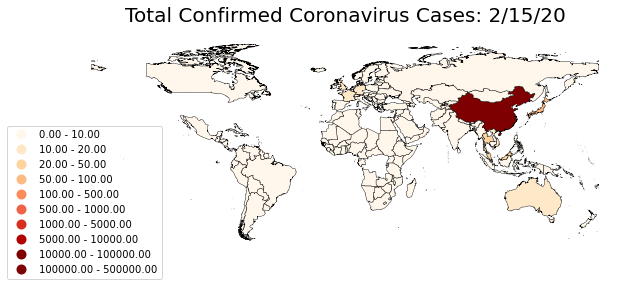

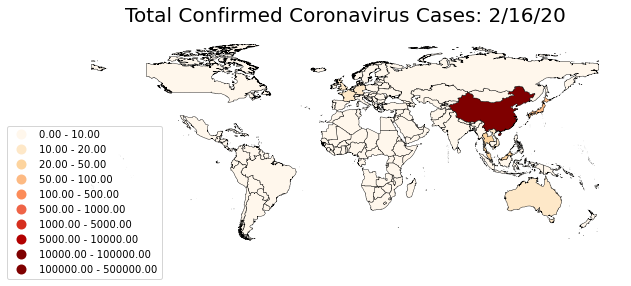

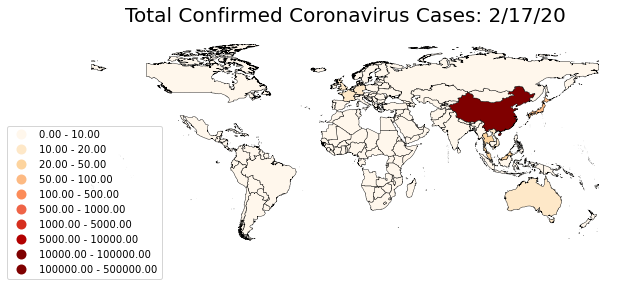

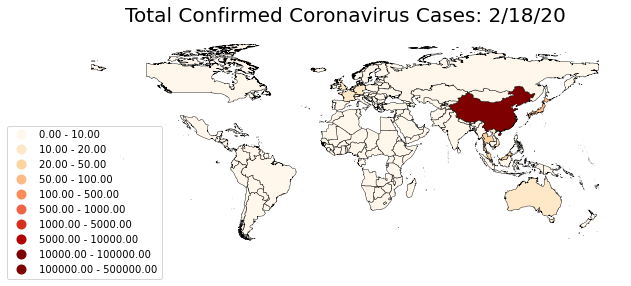

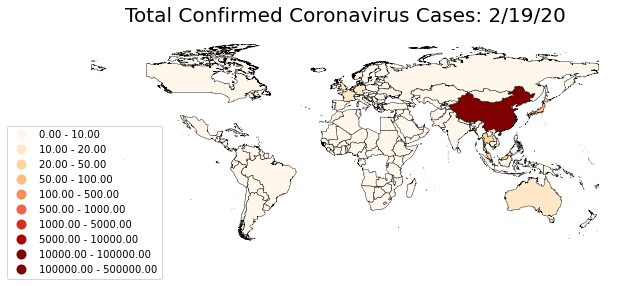

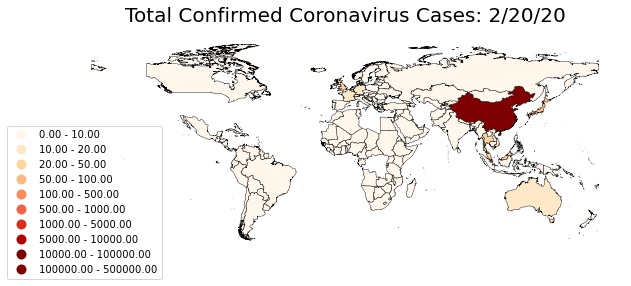

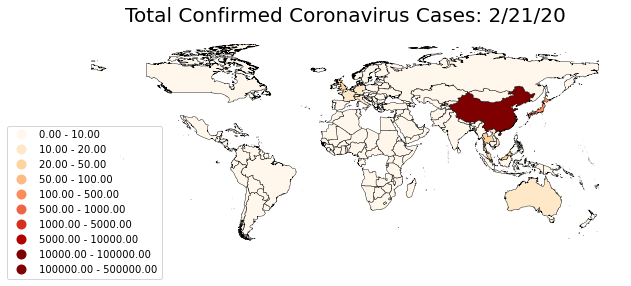

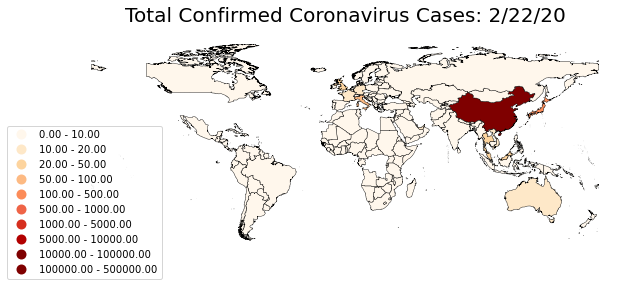

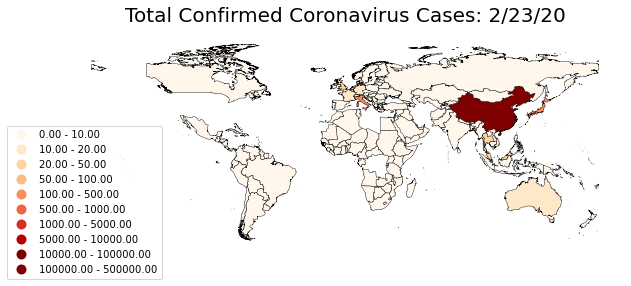

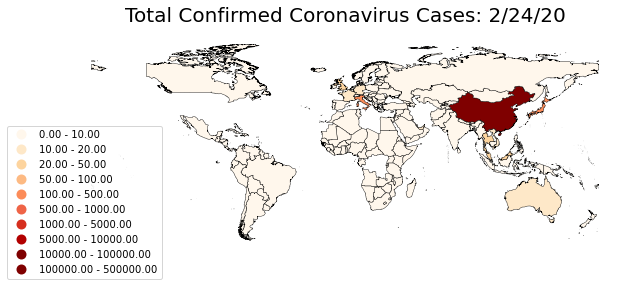

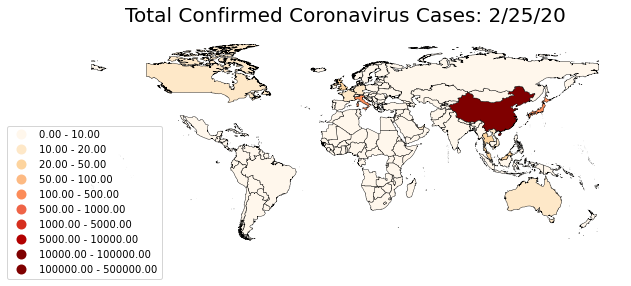

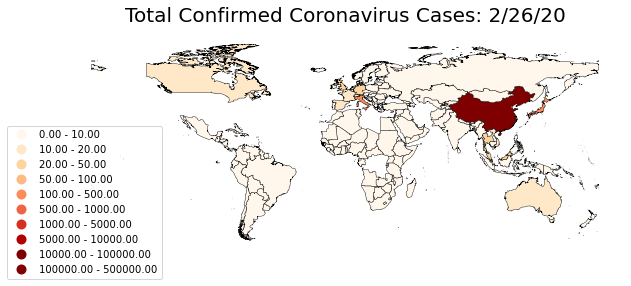

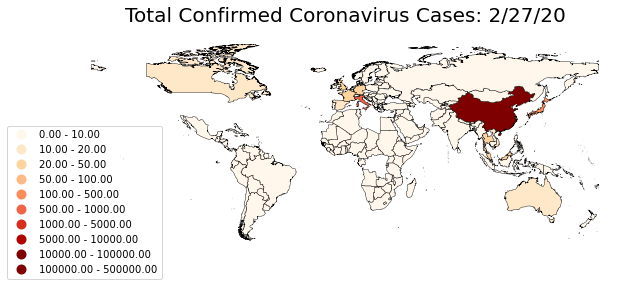

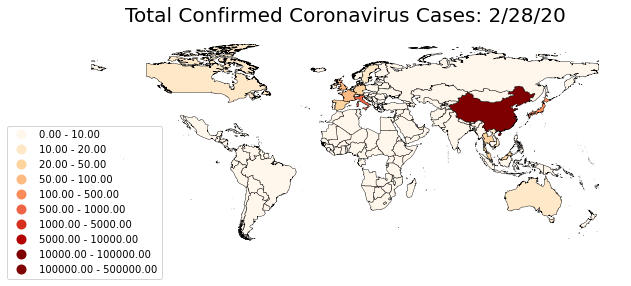

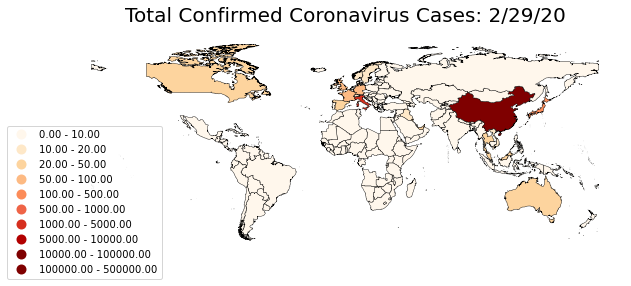

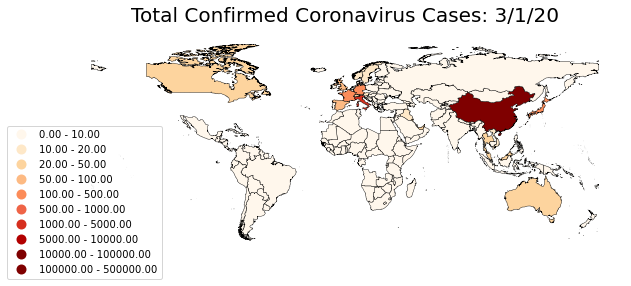

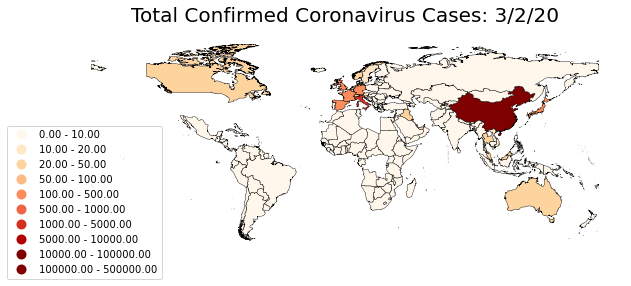

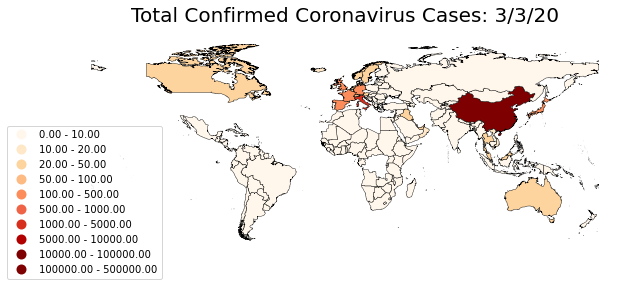

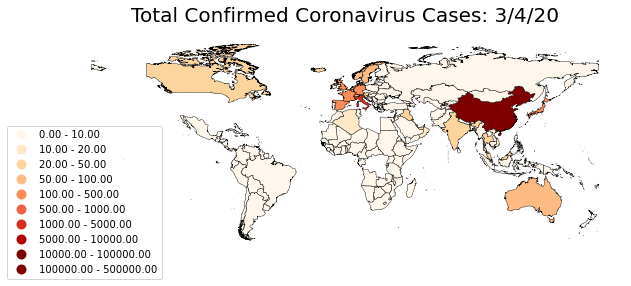

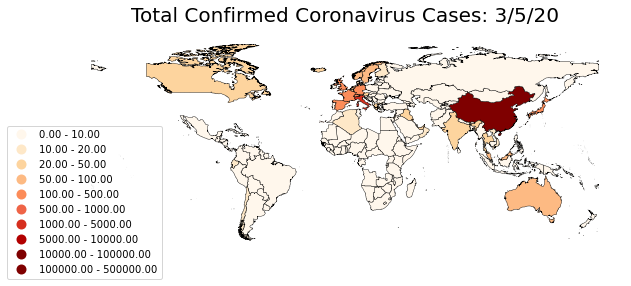

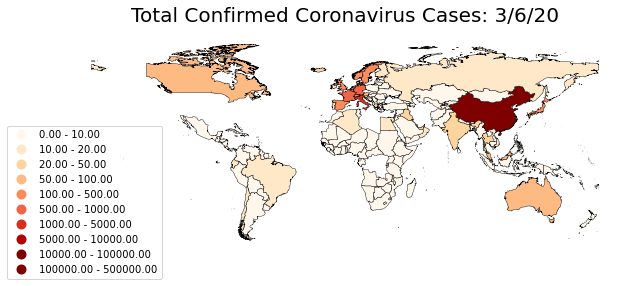

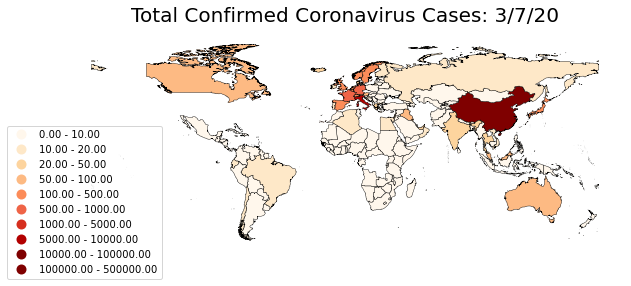

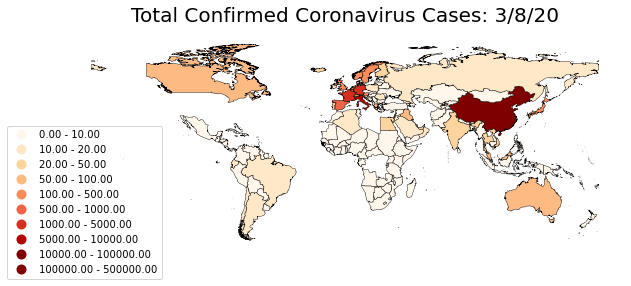

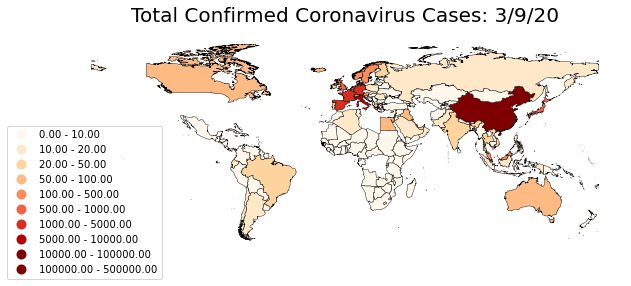

In [454]:
#9>
for date in merge.columns.to_list()[2:50]:
    A = merge.plot(column= date, cmap= 'OrRd', figsize= (10, 10), 
                legend= True, scheme= 'user_defined',
                classification_kwds= {'bins':[10, 20, 50, 100, 500, 1000, 5000, 10000, 100000, 500000]} ,
                edgecolor= 'black', linewidth= 0.4)

    A.set_title('Total Confirmed Coronavirus Cases: ' + date, fontdict={'fontsize':20}, pad= 13)

    #Remove the axes, and the legend:
    A.set_axis_off()
    A.get_legend().set_bbox_to_anchor((0.18, 0.6))
    img = A.get_figure()

    #save image:
    f = io.BytesIO()
    img.savefig(f, format= 'png', bbox_inches= 'tight')
    f.seek(0)
    img_frames.append(PIL.Image.open(f))


In [455]:
#img = A.get_figure()
#img


In [456]:
#img_frames


In [457]:
#img_frames[4]

In [458]:
#9>ceate a gif:
img_frames[0].save('Gif COVID-19 Map.gif',format= 'GIF', append_images = img_frames[1:],
                    save_all = True, duration = 300, loop = 3)
                    
f.close()